In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("imdb_movies.csv")

In [4]:
print("Number of rows:", df.shape[0]) 
print("Number of columns:", df.shape[1])

Number of rows: 9899
Number of columns: 14


In [5]:
df

,title,original_title,year,release_date,rating,votes_number,runtime,certificate,countries,genres,plot,director,cast,title_id
0,Skazani na Shawshank,The Shawshank Redemption,1994,1994-10-14,9.3,"2,132,550",142,R,['USA'],['Drama'],"In 1947, Andy Dufresne (Tim Robbins), a banker...",Frank Darabont,"['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",/title/tt0111161/
1,Mroczny rycerz,The Dark Knight,2008,2008-07-18,9.0,"2,097,299",152,PG-13,"['USA', 'UK']","['Action', 'Crime', 'Drama']",The movie begins with a gang of men with clown...,Christopher Nolan,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",/title/tt0468569/
2,Incepcja,Inception,2010,2010-07-16,8.8,"1,870,254",148,12,"['USA', 'UK']","['Action', 'Adventure', 'Sci-Fi']","A young man, exhausted and delirious, washes u...",Christopher Nolan,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",/title/tt1375666/
3,Podziemny krąg,Fight Club,1999,1999-10-15,8.8,"1,704,781",139,R,"['USA', 'Germany']",['Drama'],We back out of the webbing of neurons and brai...,David Fincher,"['Edward Norton', 'Brad Pitt', 'Meat Loaf', 'Z...",/title/tt0137523/
4,Pulp Fiction,Pulp Fiction,1994,1994-10-14,8.9,"1,673,288",154,15,['USA'],"['Crime', 'Drama']","Late one morning in the Hawthorne Grill, a res...",Quentin Tarantino,"['Tim Roth', 'Amanda Plummer', 'Laura Lovelace...",/title/tt0110912/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9894,Ciche swiatlo,Stellet Licht,2007,NaN,7.2,"5,506",145,NaN,"['Mexico', 'France', 'Netherlands', 'Germany']","['Drama', 'Romance']",\nIt looks like we don't have a Synopsis for t...,Carlos Reygadas,"['Cornelio Wall', 'Miriam Toews', 'Maria Pankr...",/title/tt0841925/
9895,Bro's Before Ho's,Bro's Before Ho's,2013,NaN,6.4,"5,504",87,NaN,['Dutch'],['Comedy'],"Drinking, smoking and getting a lot of chicks....",Steffen Haars,"['Sylvia Hoeks', 'Raymond Thiry', 'Flip Van de...",/title/tt2947832/
9896,Uçurtmayi Vurmasinlar,Uçurtmayi Vurmasinlar,1989,NaN,8.4,"5,503",100,NaN,['Turkish'],"['Crime', 'Drama']",\nIt looks like we don't have a Synopsis for t...,Tunç Basaran,"['Ozan Bilen', 'Nur Sürer', 'Füsun Demirel', '...",/title/tt0098573/
9897,Sai yau gei: Yut gwong bou haap,Sai yau gei: Yut gwong bou haap,1995,NaN,7.8,"5,502",87,NaN,['Cantonese'],"['Action', 'Adventure', 'Comedy']",\nIt looks like we don't have a Synopsis for t...,Jeffrey Lau,"['Stephen Chow', 'Man-Tat Ng', 'Kar-Ying Law',...",/title/tt0112778/


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9899 entries, 0 to 9898
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           9899 non-null   object 
 1   original_title  9899 non-null   object 
 2   year            9899 non-null   int64  
 3   release_date    6669 non-null   object 
 4   rating          9899 non-null   float64
 5   votes_number    9899 non-null   object 
 6   runtime         9899 non-null   int64  
 7   certificate     6742 non-null   object 
 8   countries       9899 non-null   object 
 9   genres          9899 non-null   object 
 10  plot            9899 non-null   object 
 11  director        9899 non-null   object 
 12  cast            9899 non-null   object 
 13  title_id        9899 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 1.1+ MB


In [7]:
print(df.isnull().sum())  

title                0
original_title       0
year                 0
release_date      3230
rating               0
votes_number         0
runtime              0
certificate       3157
countries            0
genres               0
plot                 0
director             0
cast                 0
title_id             0
dtype: int64


In [9]:
df.dtypes

title              object
original_title     object
year                int64
release_date       object
rating            float64
votes_number       object
runtime             int64
certificate        object
countries          object
genres             object
plot               object
director           object
cast               object
title_id           object
dtype: object

In [16]:
df["plot"].head(20)

0     In 1947, Andy Dufresne (Tim Robbins), a banker...
1     The movie begins with a gang of men with clown...
2     A young man, exhausted and delirious, washes u...
3     We back out of the webbing of neurons and brai...
4     Late one morning in the Hawthorne Grill, a res...
5     The film begins with a feather falling to the ...
6     The screen fills with green, cascading code wh...
7     The prologue, spoken by Galadriel, shows the D...
8     In the opening scene, a flashback, two hobbits...
9     Commissioner James Gordon (Gary Oldman) is del...
10    The film begins with a flashback to the first ...
11    A group of elderly people are giving interview...
12    In an unidentified city of constant rain and u...
13    In 1858, Django (Jamie Foxx), a slave, is chai...
14    Shouting "Roma victor!" as his forces attack, ...
15    The film's story is divided into three time-li...
16    Nick Fury (Samuel L. Jackson), director of S.H...
17    Promising FBI Academy student Clarice Star

# Data cleaning

In [19]:
columns_drop = ["original_title","plot", "cast", "title_id"]
df = df.drop(columns = columns_drop)

In [21]:
df

,title,year,release_date,rating,votes_number,runtime,certificate,countries,genres,director
0,Skazani na Shawshank,1994,1994-10-14,9.3,"2,132,550",142,R,['USA'],['Drama'],Frank Darabont
1,Mroczny rycerz,2008,2008-07-18,9.0,"2,097,299",152,PG-13,"['USA', 'UK']","['Action', 'Crime', 'Drama']",Christopher Nolan
2,Incepcja,2010,2010-07-16,8.8,"1,870,254",148,12,"['USA', 'UK']","['Action', 'Adventure', 'Sci-Fi']",Christopher Nolan
3,Podziemny krąg,1999,1999-10-15,8.8,"1,704,781",139,R,"['USA', 'Germany']",['Drama'],David Fincher
4,Pulp Fiction,1994,1994-10-14,8.9,"1,673,288",154,15,['USA'],"['Crime', 'Drama']",Quentin Tarantino
...,...,...,...,...,...,...,...,...,...,...
9894,Ciche swiatlo,2007,NaN,7.2,"5,506",145,NaN,"['Mexico', 'France', 'Netherlands', 'Germany']","['Drama', 'Romance']",Carlos Reygadas
9895,Bro's Before Ho's,2013,NaN,6.4,"5,504",87,NaN,['Dutch'],['Comedy'],Steffen Haars
9896,Uçurtmayi Vurmasinlar,1989,NaN,8.4,"5,503",100,NaN,['Turkish'],"['Crime', 'Drama']",Tunç Basaran
9897,Sai yau gei: Yut gwong bou haap,1995,NaN,7.8,"5,502",87,NaN,['Cantonese'],"['Action', 'Adventure', 'Comedy']",Jeffrey Lau


In [23]:
df["director"].nunique

<bound method IndexOpsMixin.nunique of 0          Frank Darabont
1       Christopher Nolan
2       Christopher Nolan
3           David Fincher
4       Quentin Tarantino
              ...        
9894      Carlos Reygadas
9895        Steffen Haars
9896         Tunç Basaran
9897          Jeffrey Lau
9898          Jim Hosking
Name: director, Length: 9899, dtype: object>

In [25]:
df["certificate"].value_counts(dropna=False)

certificate
R            3626
NaN          3157
PG-13        1931
PG            755
12            145
15            123
18             45
G              33
16             24
NC-17          21
7              20
b.o.           11
Unrated         4
Not Rated       3
(Banned)        1
Name: count, dtype: int64

In [27]:
df["certificate"].ffill().value_counts(dropna=False)

certificate
R            5497
PG-13        2734
PG           1107
12            173
15            143
18             68
G              53
NC-17          44
16             34
7              20
b.o.           13
Not Rated       8
Unrated         4
(Banned)        1
Name: count, dtype: int64

In [29]:
df[df["release_date"].isnull()][["title","year","release_date"]].to_csv("null_releasedate.csv")

In [31]:
df["certificate"]=df["certificate"].ffill()

In [79]:
df["release_date"] = pd.to_datetime(df["release_date"], errors = "coerce")

df.dtypes


title                      object
year                        int64
release_date       datetime64[ns]
rating                    float64
votes_number               object
runtime                     int64
certificate                object
director                   object
Main_country               object
Other_countries            object
Main_genre                 object
Other_genres               object
dtype: object

In [35]:
df["release_date"] = df["release_date"].fillna(" ")

In [37]:
df

,title,year,release_date,rating,votes_number,runtime,certificate,countries,genres,director
0,Skazani na Shawshank,1994,1994-10-14 00:00:00,9.3,"2,132,550",142,R,['USA'],['Drama'],Frank Darabont
1,Mroczny rycerz,2008,2008-07-18 00:00:00,9.0,"2,097,299",152,PG-13,"['USA', 'UK']","['Action', 'Crime', 'Drama']",Christopher Nolan
2,Incepcja,2010,2010-07-16 00:00:00,8.8,"1,870,254",148,12,"['USA', 'UK']","['Action', 'Adventure', 'Sci-Fi']",Christopher Nolan
3,Podziemny krąg,1999,1999-10-15 00:00:00,8.8,"1,704,781",139,R,"['USA', 'Germany']",['Drama'],David Fincher
4,Pulp Fiction,1994,1994-10-14 00:00:00,8.9,"1,673,288",154,15,['USA'],"['Crime', 'Drama']",Quentin Tarantino
...,...,...,...,...,...,...,...,...,...,...
9894,Ciche swiatlo,2007,,7.2,"5,506",145,R,"['Mexico', 'France', 'Netherlands', 'Germany']","['Drama', 'Romance']",Carlos Reygadas
9895,Bro's Before Ho's,2013,,6.4,"5,504",87,R,['Dutch'],['Comedy'],Steffen Haars
9896,Uçurtmayi Vurmasinlar,1989,,8.4,"5,503",100,R,['Turkish'],"['Crime', 'Drama']",Tunç Basaran
9897,Sai yau gei: Yut gwong bou haap,1995,,7.8,"5,502",87,R,['Cantonese'],"['Action', 'Adventure', 'Comedy']",Jeffrey Lau


In [39]:
df.duplicated()


0       False
1       False
2       False
3       False
4       False
        ...  
9894    False
9895    False
9896    False
9897    False
9898    False
Length: 9899, dtype: bool

In [41]:
df[["Main_country", "Other_countries"]] = df["countries"].str.split(",", n=1, expand=True)
df["countries"] = df["countries"].str.replace(r"[\[\]']", "", regex=True)
df = df.drop(columns= "countries")

In [43]:
df

,title,year,release_date,rating,votes_number,runtime,certificate,genres,director,Main_country,Other_countries
0,Skazani na Shawshank,1994,1994-10-14 00:00:00,9.3,"2,132,550",142,R,['Drama'],Frank Darabont,['USA'],None
1,Mroczny rycerz,2008,2008-07-18 00:00:00,9.0,"2,097,299",152,PG-13,"['Action', 'Crime', 'Drama']",Christopher Nolan,['USA','UK']
2,Incepcja,2010,2010-07-16 00:00:00,8.8,"1,870,254",148,12,"['Action', 'Adventure', 'Sci-Fi']",Christopher Nolan,['USA','UK']
3,Podziemny krąg,1999,1999-10-15 00:00:00,8.8,"1,704,781",139,R,['Drama'],David Fincher,['USA','Germany']
4,Pulp Fiction,1994,1994-10-14 00:00:00,8.9,"1,673,288",154,15,"['Crime', 'Drama']",Quentin Tarantino,['USA'],None
...,...,...,...,...,...,...,...,...,...,...,...
9894,Ciche swiatlo,2007,,7.2,"5,506",145,R,"['Drama', 'Romance']",Carlos Reygadas,['Mexico',"'France', 'Netherlands', 'Germany']"
9895,Bro's Before Ho's,2013,,6.4,"5,504",87,R,['Comedy'],Steffen Haars,['Dutch'],None
9896,Uçurtmayi Vurmasinlar,1989,,8.4,"5,503",100,R,"['Crime', 'Drama']",Tunç Basaran,['Turkish'],None
9897,Sai yau gei: Yut gwong bou haap,1995,,7.8,"5,502",87,R,"['Action', 'Adventure', 'Comedy']",Jeffrey Lau,['Cantonese'],None


In [45]:
df[df["Main_country"].apply(lambda x: "UK" in x)]

,title,year,release_date,rating,votes_number,runtime,certificate,genres,director,Main_country,Other_countries
9,Mroczny Rycerz powstaje,2012,2012-07-20 00:00:00,8.4,"1,405,531",164,PG-13,"['Action', 'Thriller']",Christopher Nolan,['UK','USA']
56,Lśnienie,1980,1980-06-13 00:00:00,8.4,"796,902",146,PG-13,"['Drama', 'Horror']",Stanley Kubrick,['UK','USA']
64,"Slumdog, milioner z ulicy",2008,2008-12-25 00:00:00,8.0,"754,025",120,R,"['Drama', 'Romance']",Danny Boyle,['UK','India']
66,Terminator,1984,1984-10-26 00:00:00,8.0,"740,296",107,15,"['Action', 'Sci-Fi']",James Cameron,['UK','USA']
69,Przekret,2000,2001-01-19 00:00:00,8.3,"727,968",104,R,"['Comedy', 'Crime']",Guy Ritchie,['UK','USA']
...,...,...,...,...,...,...,...,...,...,...,...
9809,Bunkier SS,2001,,5.5,"5,594",95,R,"['Drama', 'Horror', 'Mystery']",Rob Green,['UK'],None
9825,Ostatni pasażer,2013,2014-04-25 00:00:00,5.7,"5,578",97,R,"['Action', 'Mystery', 'Thriller']",Omid Nooshin,['UK'],None
9844,"Ultramarines: A Warhammer 40,000 Movie",2010,,5.6,"5,550",76,R,"['Animation', 'Action', 'Fantasy']",Martyn Pick,['UK'],None
9869,Rachunek sumienia,2002,,6.5,"5,530",112,R,"['Crime', 'Drama', 'Mystery']",Paul McGuigan,['UK','Spain']


In [47]:
df[["Main_genre", "Other_genres"]] = df["genres"].str.split(",", n=1, expand=True)
df["genres"] = df["genres"].str.replace(r"[\[\]']", "", regex=True)
df = df.drop(columns = "genres")

In [49]:
df

,title,year,release_date,rating,votes_number,runtime,certificate,director,Main_country,Other_countries,Main_genre,Other_genres
0,Skazani na Shawshank,1994,1994-10-14 00:00:00,9.3,"2,132,550",142,R,Frank Darabont,['USA'],None,['Drama'],None
1,Mroczny rycerz,2008,2008-07-18 00:00:00,9.0,"2,097,299",152,PG-13,Christopher Nolan,['USA','UK'],['Action',"'Crime', 'Drama']"
2,Incepcja,2010,2010-07-16 00:00:00,8.8,"1,870,254",148,12,Christopher Nolan,['USA','UK'],['Action',"'Adventure', 'Sci-Fi']"
3,Podziemny krąg,1999,1999-10-15 00:00:00,8.8,"1,704,781",139,R,David Fincher,['USA','Germany'],['Drama'],None
4,Pulp Fiction,1994,1994-10-14 00:00:00,8.9,"1,673,288",154,15,Quentin Tarantino,['USA'],None,['Crime','Drama']
...,...,...,...,...,...,...,...,...,...,...,...,...
9894,Ciche swiatlo,2007,,7.2,"5,506",145,R,Carlos Reygadas,['Mexico',"'France', 'Netherlands', 'Germany']",['Drama','Romance']
9895,Bro's Before Ho's,2013,,6.4,"5,504",87,R,Steffen Haars,['Dutch'],None,['Comedy'],None
9896,Uçurtmayi Vurmasinlar,1989,,8.4,"5,503",100,R,Tunç Basaran,['Turkish'],None,['Crime','Drama']
9897,Sai yau gei: Yut gwong bou haap,1995,,7.8,"5,502",87,R,Jeffrey Lau,['Cantonese'],None,['Action',"'Adventure', 'Comedy']"


# EDA

In [52]:
df.describe()

,year,rating,runtime
count,9899.000000,9899.000000,9899.000000
mean,2004.739671,6.498737,108.219315
std,9.944726,1.032876,21.792582
min,1980.000000,1.000000,5.000000
25%,1998.000000,5.900000,94.000000
50%,2007.000000,6.600000,104.000000
75%,2013.000000,7.200000,117.000000
max,2019.000000,9.500000,566.000000


In [54]:
#top 10 rated movies
df.sort_values(by="rating", ascending=False).head(10)


,title,year,release_date,rating,votes_number,runtime,certificate,director,Main_country,Other_countries,Main_genre,Other_genres
6268,Joker,2019,2019-10-04 00:00:00,9.5,"13,168",122,R,Todd Phillips,['USA','Canada'],['Crime',"'Drama', 'Thriller']"
0,Skazani na Shawshank,1994,1994-10-14 00:00:00,9.3,"2,132,550",142,R,Frank Darabont,['USA'],None,['Drama'],None
5426,Wheels,2014,,9.3,"17,368",115,R,Tim Gagliardo,['USA'],None,['Drama'],None
7102,Peranbu,2018,,9.3,"10,363",147,PG-13,Ram,['Tamil'],None,['Drama'],None
9046,Aloko Udapadi,2017,,9.2,"6,523",113,PG-13,Chathra Weeraman,['Sri Lanka'],None,['Drama','History']
5204,Aynabaji,2016,,9.2,"18,635",147,R,Amitabh Reza Chowdhury,['Bangladesh'],None,['Crime',"'Mystery', 'Thriller']"
3258,CM101MMXI Fundamentals,2013,,9.2,"41,886",139,PG-13,Murat Dündar,['Turkey'],None,['Documentary','Comedy']
6262,Rodzinny interes,1982,,9.0,"13,196",92,R,Slobodan Sijan,['Serbian'],None,['Comedy','Drama']
1,Mroczny rycerz,2008,2008-07-18 00:00:00,9.0,"2,097,299",152,PG-13,Christopher Nolan,['USA','UK'],['Action',"'Crime', 'Drama']"
1596,Dag II,2016,,9.0,"101,338",135,R,Alper Caglar,['Turkey'],None,['Action',"'Drama', 'War']"


In [56]:
#movies with most votes
df.sort_values(by="votes_number", ascending=False).head(10)

,title,year,release_date,rating,votes_number,runtime,certificate,director,Main_country,Other_countries,Main_genre,Other_genres
1612,Zrodzony w ogniu,2013,2013-12-06 00:00:00,6.8,"99,980",116,R,Scott Cooper,['UK','USA'],['Action',"'Crime', 'Drama']"
1613,W obronie własnej,2013,2013-11-27 00:00:00,6.5,"99,815",100,R,Gary Fleder,['USA'],None,['Action','Thriller']
1614,Gliniarz z Beverly Hills II,1987,1987-05-20 00:00:00,6.5,"99,772",100,R,Tony Scott,['English'],None,['Action',"'Comedy', 'Crime']"
1615,Cudowne dziecko,2007,2007-11-21 00:00:00,7.5,"99,724",114,PG,Kirsten Sheridan,['USA'],None,['Drama','Music']
1616,T2: Trainspotting,2017,2017-03-31 00:00:00,7.2,"99,600",117,R,Danny Boyle,['UK'],None,['Drama'],None
1617,Oszukać przeznaczenie 5,2011,2011-08-12 00:00:00,5.8,"99,448",92,R,Steven Quale,['USA',"'Canada', 'Singapore', 'Hong Kong']",['Horror'],None
1618,Dwa tygodnie na miłość,2002,2002-12-20 00:00:00,6.1,"99,292",101,PG-13,Marc Lawrence,['USA','Australia'],['Comedy','Romance']
1619,Wieczny student,2002,2002-04-05 00:00:00,6.4,"99,206",92,R,Walt Becker,['Germany','USA'],['Comedy','Romance']
1620,Trzej muszkieterowie,2011,2011-10-21 00:00:00,5.7,"99,091",110,PG-13,Paul W.S. Anderson,['USA',"'Germany', 'France', 'UK']",['Action',"'Adventure', 'Romance']"
1621,Motyl i skafander,2007,2008-02-01 00:00:00,8.0,"99,087",112,PG-13,Julian Schnabel,['France','USA'],['Biography','Drama']


In [108]:
#most common genres
df["Main_genre"].value_counts().head(10)


Main_genre
['Comedy'       2335
['Action'       2157
['Drama'        1470
['Crime'         718
['Biography'     510
['Adventure'     449
['Animation'     443
['Drama']        439
['Horror'        414
['Comedy']       357
Name: count, dtype: int64

In [110]:
#Average rating per genre

df.groupby("Main_genre")["rating"].mean().sort_values(ascending=False).head(10)


Main_genre
['Documentary'     7.535747
['Documentary']    7.334524
['Music']          7.200000
['Drama']          7.169021
['Thriller'        7.160000
['Biography'       7.052941
['Romance'         6.925000
['Musical'         6.900000
['Animation'       6.802935
['Fantasy']        6.800000
Name: rating, dtype: float64

# Visualization

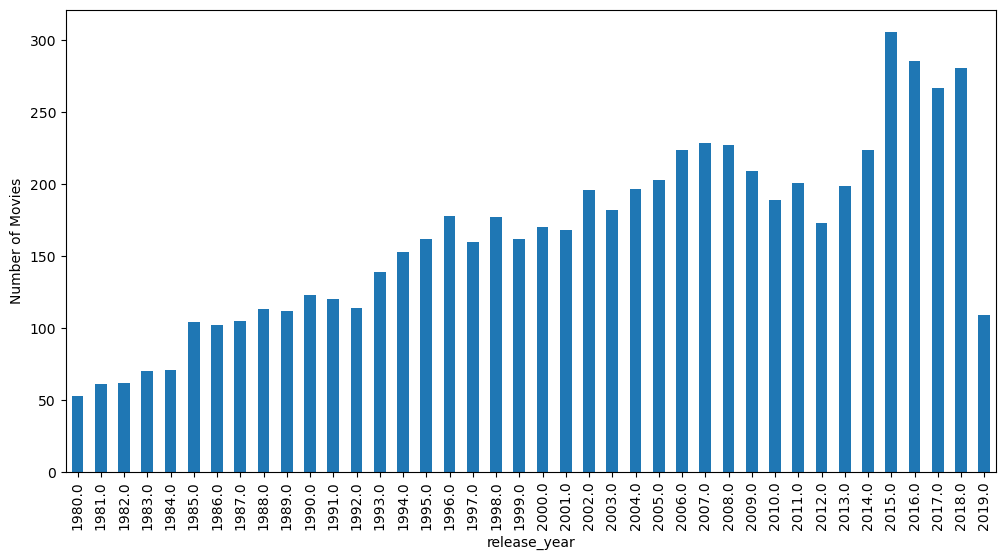

In [97]:
#movies released per year

df["release_year"] = df["release_date"].dt.year
df["release_year"].value_counts().sort_index().plot(kind="bar", figsize=(12,6))
plt.ylabel("Number of Movies")
plt.show()

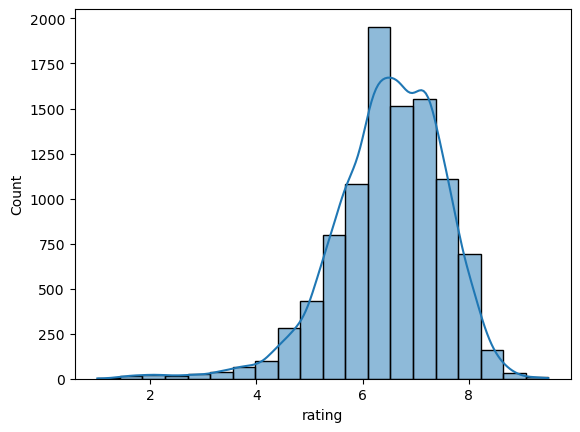

In [69]:
#ratings distribution over movies
sns.histplot(df["rating"], bins=20, kde=True)
plt.show()

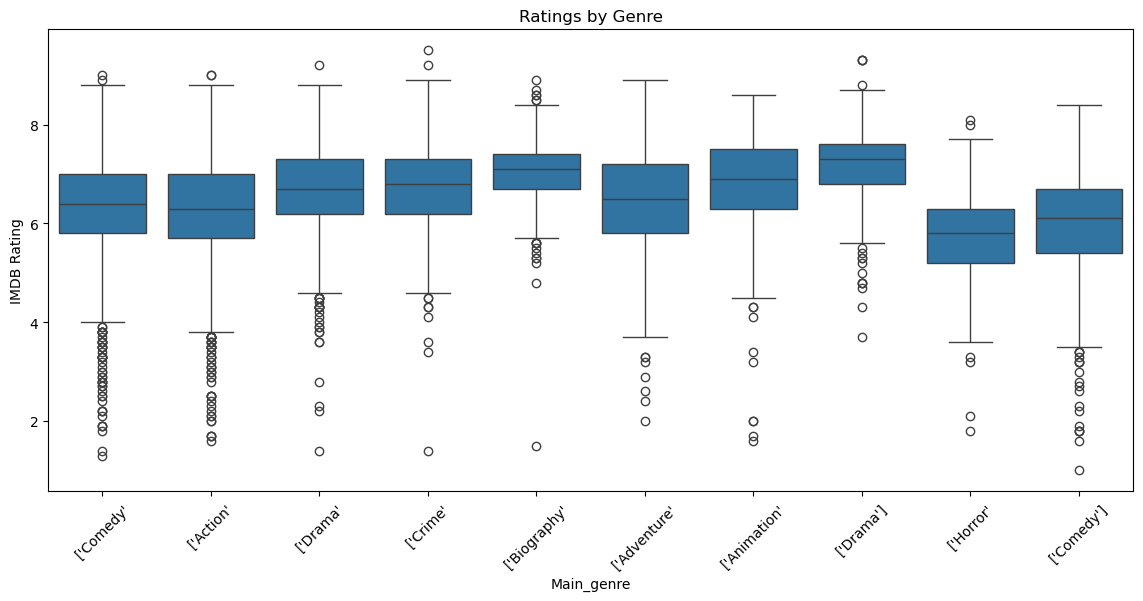

In [91]:
plt.figure(figsize=(14,6))
top_genres = df["Main_genre"].explode().value_counts().head(10).index
df_top_genres = df[df["Main_genre"].apply(lambda x: any(g in x for g in top_genres))]

sns.boxplot(x="Main_genre", y="rating", data=df_top_genres, order=top_genres)
plt.xticks(rotation=45)
plt.xlabel("Main_genre")
plt.ylabel("IMDB Rating")
plt.title("Ratings by Genre")
plt.show()


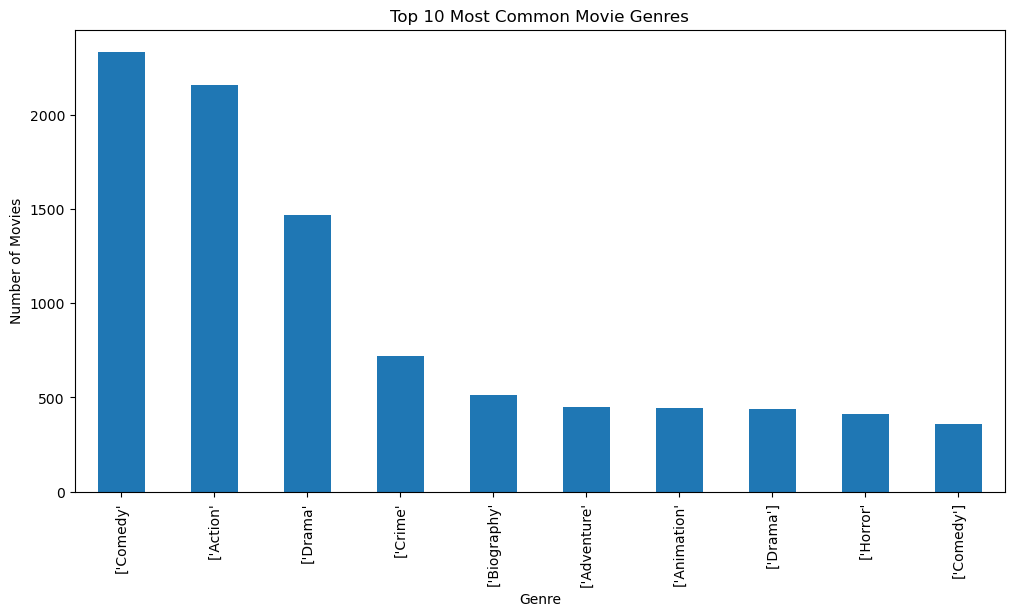

In [101]:
# What are the top 10 most common movie genres?

df["Main_genre"].value_counts().head(10).plot(kind="bar", figsize=(12,6))
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.title("Top 10 Most Common Movie Genres")
plt.show()


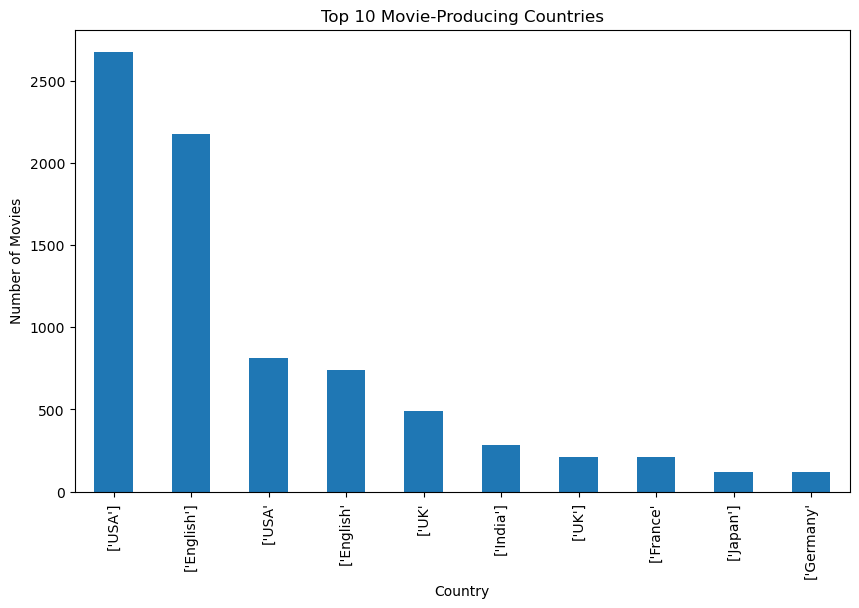

In [105]:
#Which countries produce the most movies?

df["Main_country"].explode().value_counts().head(10).plot(kind="bar", figsize=(10,6))
plt.xlabel("Country")
plt.ylabel("Number of Movies")
plt.title("Top 10 Movie-Producing Countries")
plt.show()
